In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import pandas as pd
import numpy as np
import csv
df = pd.read_csv("/content/drive/MyDrive/Datasetforasm3.csv",encoding='latin1')

In [ ]:
df.head()

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [57]:
df['label'].value_counts()

0    8000
1    2314
Name: label, dtype: int64

In [58]:
df.drop_duplicates(inplace = True)

In [59]:
df['label'].value_counts()

0    7996
1    2287
Name: label, dtype: int64

In [60]:
df.isnull().sum()

message    0
label      0
dtype: int64

In [61]:
x = df.message.values
x

array(['just had a real good moment. i missssssssss him so much, ',
       'is reading manga  http://plurk.com/p/mzp1e',
       '@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8 ',
       ...,
       'Ketamine Nasal Spray Shows Promise Against Depression, Suicide #health https://cmun.it/4sjligkÃ\x82Â\xa0',
       "dont mistake a bad day with depression! everyone has 'em!", '0'],
      dtype=object)

In [62]:
y = df.label.values
y

array([0, 0, 0, ..., 1, 1, 1])

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
def vectorizer(x):
  cv = CountVectorizer()
  x_train = cv.fit_transform(x)#xtrain changed
  print(cv.get_feature_names())
  print(x_train.toarray()) 
  return x_train
train = vectorizer(x)

['00', '000', '00007ã', '00152258', '007peter', '00am', '00pm', '02', '02am', '03', '03q2yx', '04', '042418', '0435xcwpc2', '0438138242743153', '05', '06', '0628', '07', '07958938647', '08', '09', '09638237', '09casper', '0_0', '0ahukewirjnbe7dtaahvgkgmkhu58bx4q_auieygd', '0beck', '0bqk7k3z5y', '0h', '0i22i30j33i22i29i30l4', '0j36j4j1', '0j41j0i131j0i67j0i131i67j33i160', '0ltrdaj', '0ssnsdl0nh', '0x526vj', '10', '100', '1000', '10000', '1002', '10066808', '100s', '100ã', '101', '1011', '10156186831475782', '10156368936572238ã', '10160250333315331ã', '101alternativehealing', '10204373831102704ã', '10216818240038376ã', '10530', '106andpark', '1080', '109', '10aac3aã', '10am', '10pm', '10th', '10x', '10yearsofenema', '10yrs', '11', '110', '111448716', '112ro8', '11346264ã', '113ph6', '11717343ã', '1176', '11943236', '11e8', '11rep', '12', '1200', '121981_4562', '1225ã', '123', '1284836754953259ã', '12g9r', '12kof0', '12mp', '12pm', '12th', '12toou', '13', '130', '13283521', '13cwwchdsc', 

In [64]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_train, y, test_size=0.2)

In [85]:
print(xtrain.toarray())
print(xtrain.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(8226, 22493)


In [66]:
import tensorflow as tf
def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.sparse.reorder(tf.SparseTensor(indices, coo.data, coo.shape))

X_onehot1=convert_sparse_matrix_to_sparse_tensor(xtrain)

X_test1=convert_sparse_matrix_to_sparse_tensor(xtest)

In [67]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.wrappers.scikit_learn import KerasClassifier

In [68]:
input_dim = xtrain.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(20, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(10,  activation='tanh'))
model.add(layers.Dense(1024, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5)) # Dropout for reducing overfitting
model.add(layers.Dense(1, activation='sigmoid'))

In [69]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                449880    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              11264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 1025      
Total params: 466,475
Trainable params: 464,427
Non-trainable params: 2,048
____________________________________________

In [70]:
print(input_dim)

22493


In [71]:
classifier_nn = model.fit(X_onehot1,ytrain,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test1, ytest),
                    batch_size=15)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_1/dense_4/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_1/dense_4/embedding_lookup_sparse/Reshape:0", shape=(None, 20), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_1/dense_4/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


549/549 [==============================] - 16s 27ms/step - loss: 0.0817 - accuracy: 0.9737 - val_loss: 0.0313 - val_accuracy: 0.9942
Epoch 2/10
549/549 [==============================] - 15s 28ms/step - loss: 0.0332 - accuracy: 0.9919 - val_loss: 0.0358 - val_accuracy: 0.9951
Epoch 3/10
549/549 [==============================] - 15s 27ms/step - loss: 0.0145 - accuracy: 0.9976 - val_loss: 0.0413 - val_accuracy: 0.9947
Epoch 4/10
549/549 [==============================] - 15s 27ms/step - loss: 0.0083 - accuracy: 0.9987 - val_loss: 0.0335 - val_accuracy: 0.9956
Epoch 5/10
549/549 [==============================] - 14s 26ms/step - loss: 0.0063 - accuracy: 0.9994 - val_loss: 0.0361 - val_accuracy: 0.9966
Epoch 6/10
549/549 [==============================] - 15s 28ms/step - loss: 0.0049 - accuracy: 0.9993 - val_loss: 0.0443 - val_accuracy: 0.9951
Epoch 7/10
549/549 [==============================] - 15s 27ms/step - loss: 0.0078 - accuracy: 0.9985 - val_loss: 0.0341 - val_accuracy: 0.9956
Epo

In [72]:
loss = [0.0817 ,0.0332  ,0.0145  ,0.0083 ,0.0063 ,0.0049 , 0.0078 ,0.0103 ,0.0073  ,0.0048]
acuuracy = [0.9737  ,0.9919,0.9976,0.9987  ,0.9994  ,0.9993   ,0.9985  ,0.9985,0.9984  ,0.9989 ]

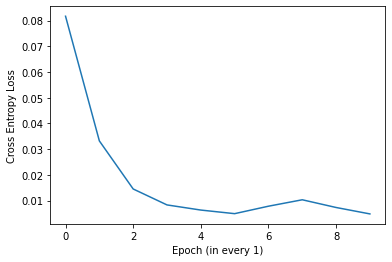

In [73]:
import matplotlib
import matplotlib.pyplot as plt


plt.plot(loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Epoch (in every 1)')
plt.show()

In [74]:
epoch = list(range(0,10,1));

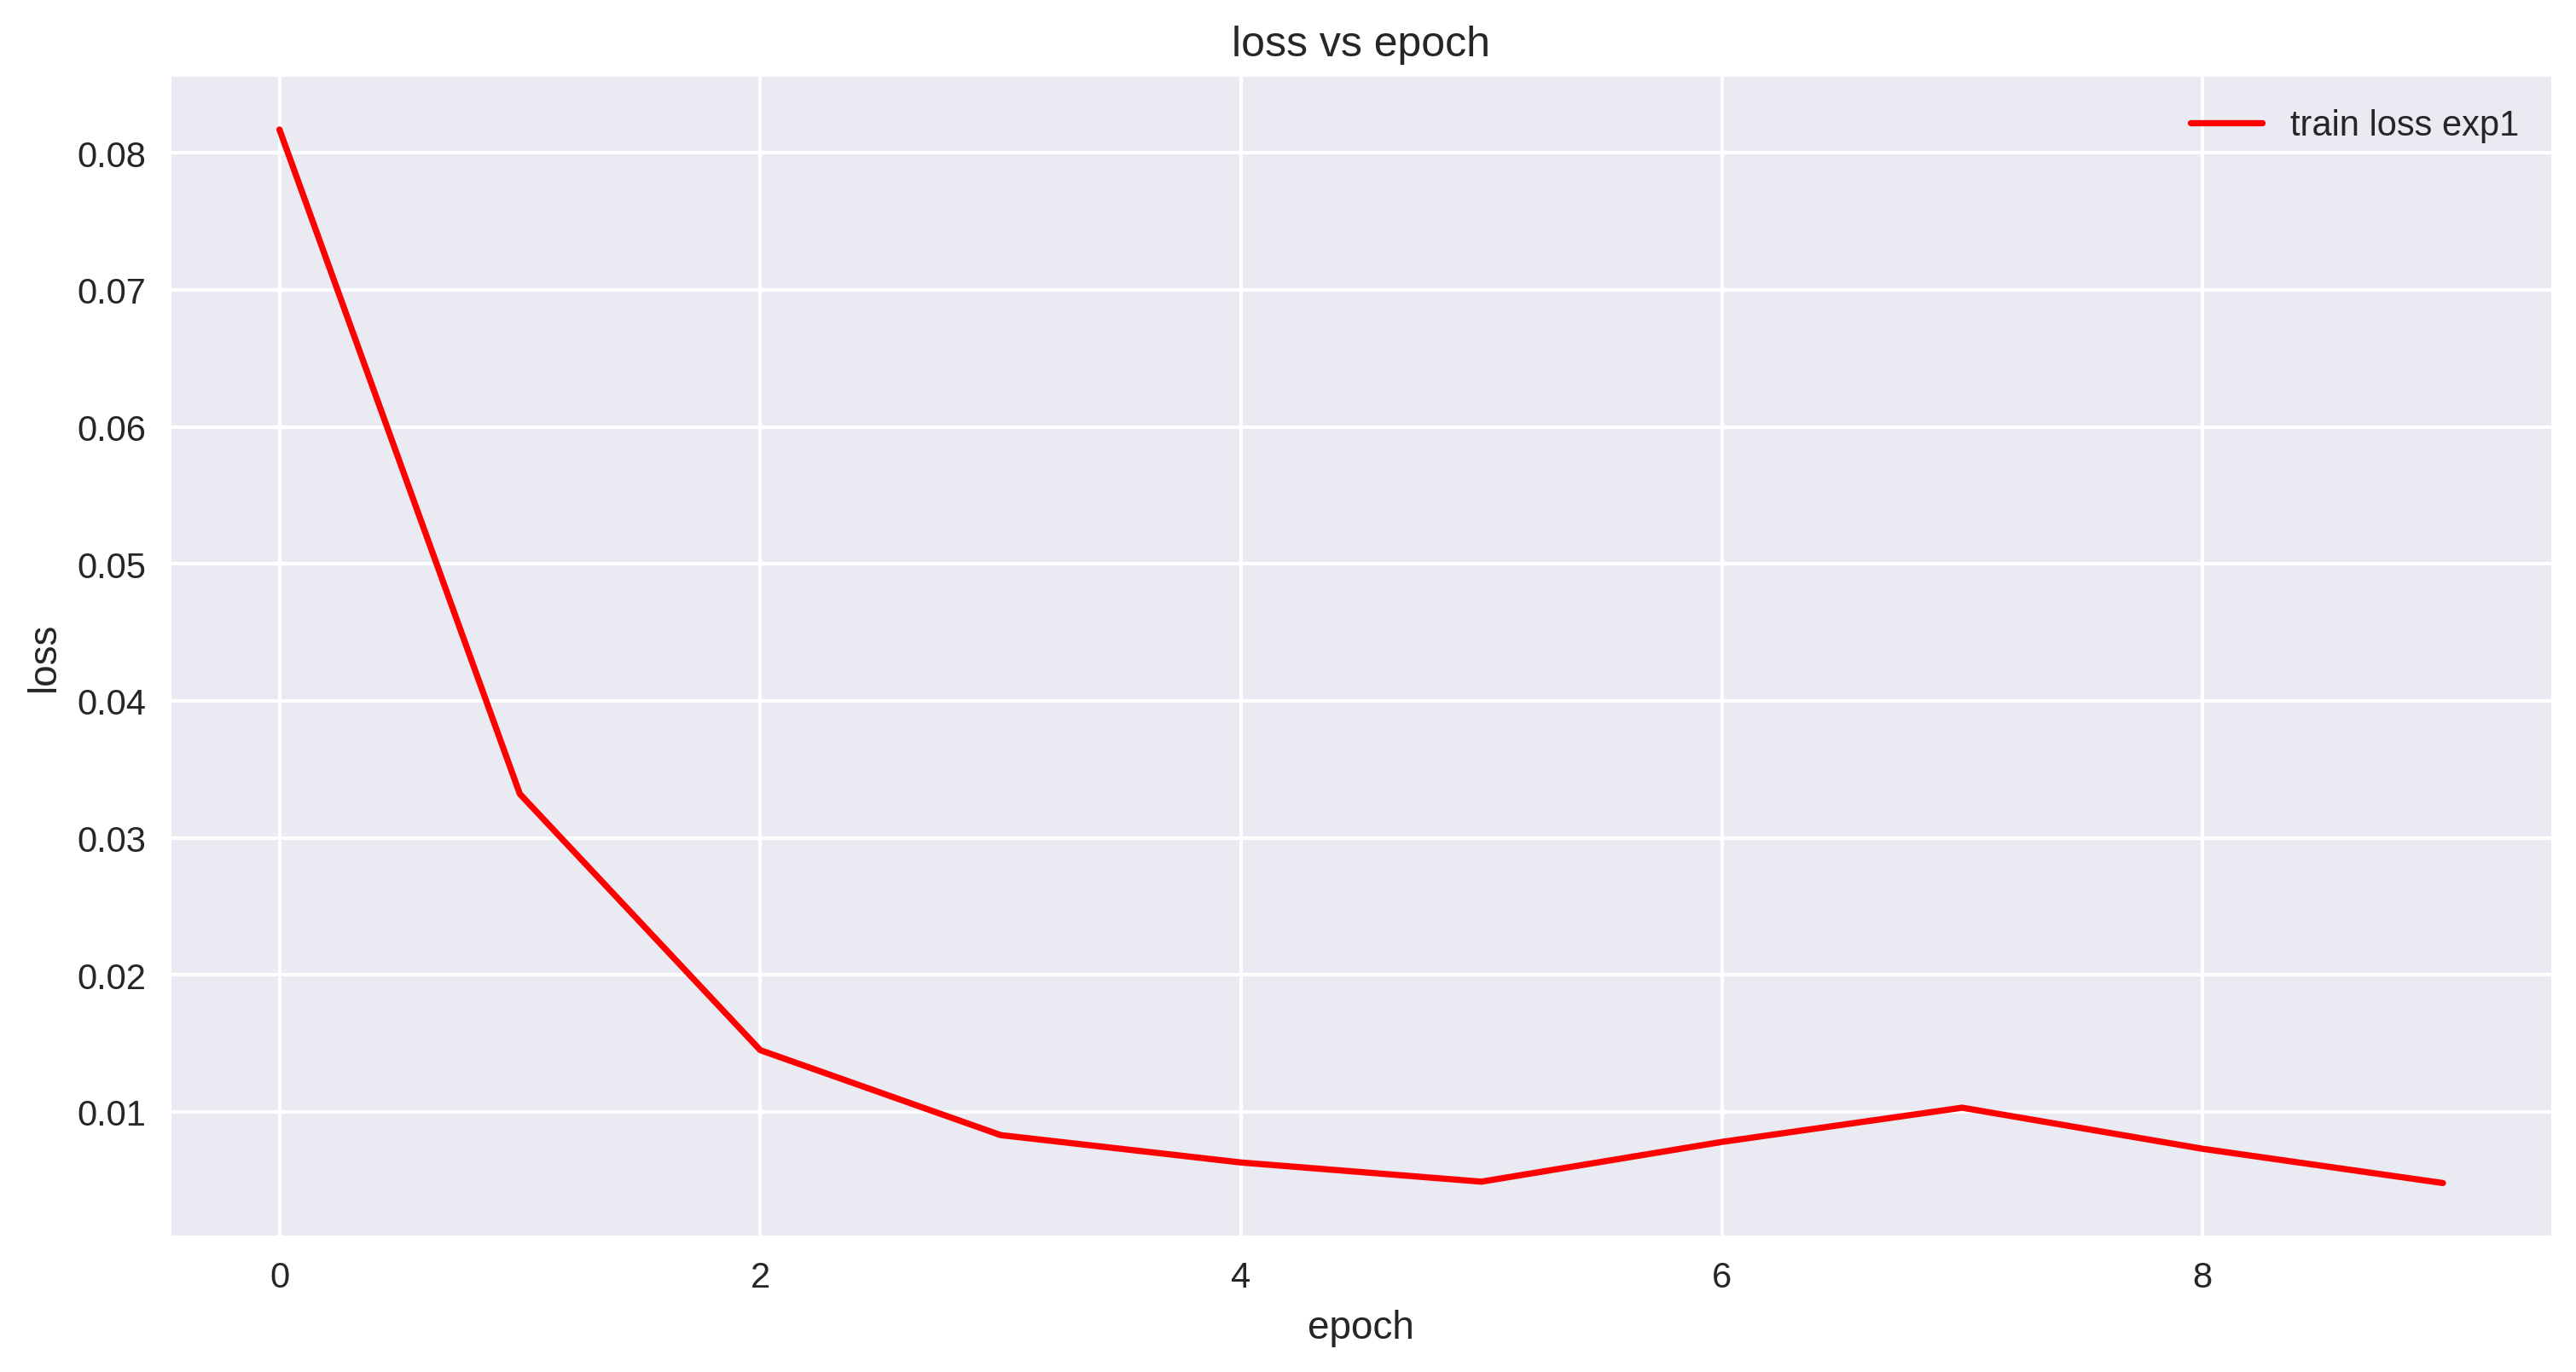

In [75]:
plt.figure(figsize=(12,6),dpi=300);
plt.style.use('seaborn');

plt.plot(epoch , loss, color='red',label='train loss exp1');
plt.title('loss vs epoch');
plt.xlabel('epoch');
plt.ylabel('loss');
plt.grid(True); #create a grid layout
plt.legend();
plt.show()

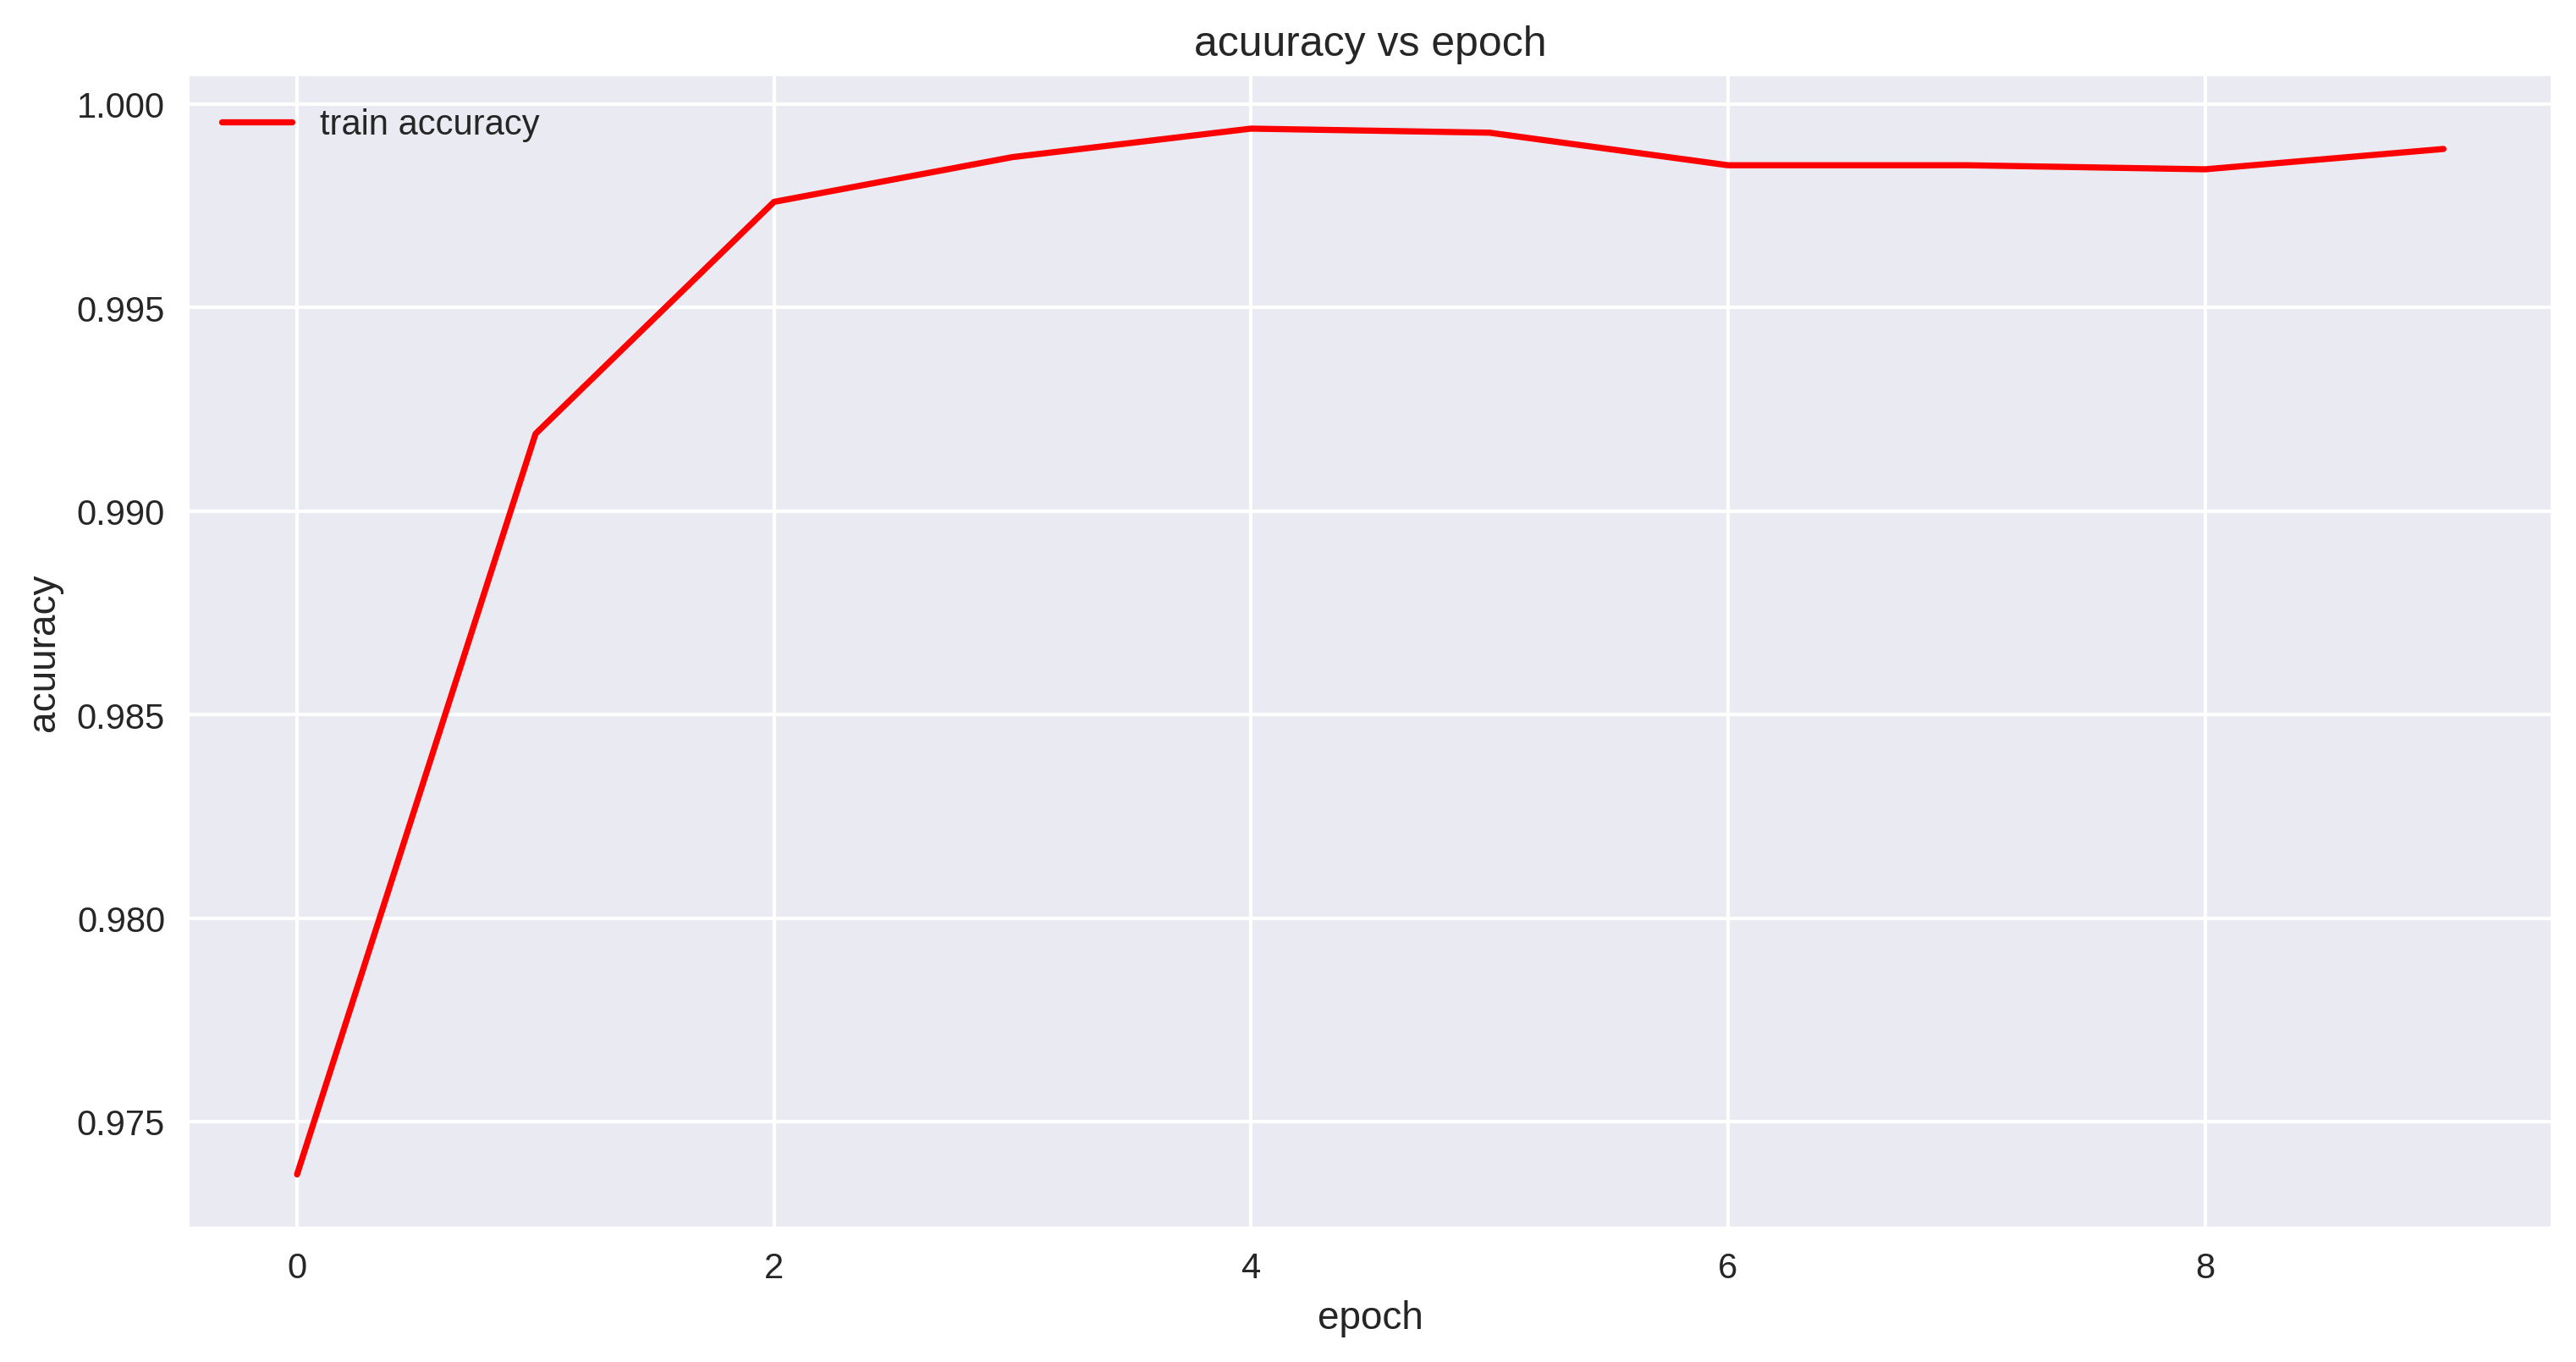

In [76]:
plt.figure(figsize=(12,6),dpi=300);
plt.style.use('seaborn');

plt.plot(epoch , acuuracy, color='red',label='train accuracy');
plt.title('acuuracy vs epoch');
plt.xlabel('epoch');
plt.ylabel('acuuracy');
plt.grid(True); #create a grid layout
plt.legend();
plt.show()

In [83]:
def predict_sentiment(test):
  #vectorized_test = vectorizer(test)
  #print(vectorized_test.toarray())
  #vectorized_test =vectorized_test.reshape(-1,1)
  cv = CountVectorizer()
  x_test = cv.fit_transform(test)#xtrain changed
  print(cv.get_feature_names())
  print(x_test.toarray())
  coo = x_test.tocoo()
  indices = np.mat([coo.row, coo.col]).transpose()
  #sparse_vectorized_test = convert_sparse_matrix_to_sparse_tensor(vectorized_test)
  sparse_vectorized_test=tf.sparse.reorder(tf.SparseTensor(indices, coo.data, coo.shape))
  pred=model.predict(sparse_vectorized_test)
  for i in range(len(pred)):
    if pred[i]>0.5:
      print(' Positive sentiment')
      return 1
    elif pred[i]<=0.5:
      print(' Negative sentiment')
      return 0


In [84]:
test_text = ["very good."]
result = predict_sentiment(test_text)

['good', 'very']
[[1 1]]


ValueError: ignored

In [100]:
pred=model.predict(X_test1)
for i in range(len(pred)):
    if pred[i]>0.5:
        pred[i]=1
    elif pred[i]<=0.5:
        pred[i]=0

In [104]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
accuracy_of_model = accuracy_score(ytest,pred)
precision_of_model = precision_score(ytest, pred)
recall_of_model = recall_score(ytest, pred)

In [105]:
print('For CNN:')
print("  Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy_of_model,precision_of_model, recall_of_model))

For CNN:
  Accuracy : 0.9951385512882839 
 Precision : 1.0 
 Recall : 0.9758454106280193


**Confusion Matrix**

For CNN


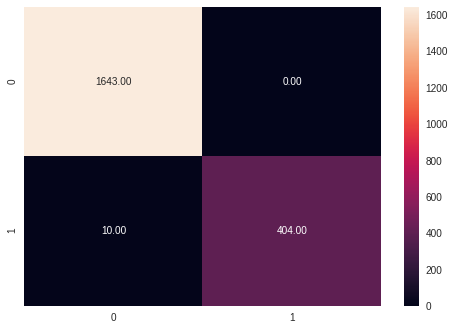

In [108]:
from sklearn.metrics import confusion_matrix
cnn_cm =confusion_matrix(ytest,pred)
import seaborn as sns
print("For CNN")
sns.heatmap(cnn_cm, annot=True,fmt='0.2f')

In [109]:
from sklearn.metrics import classification_report
print('For CNN :')
print(classification_report(ytest,pred))

For CNN :
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1643
           1       1.00      0.98      0.99       414

    accuracy                           1.00      2057
   macro avg       1.00      0.99      0.99      2057
weighted avg       1.00      1.00      1.00      2057

